In [36]:
import torch
import torchinfo
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [37]:
weights_enum = torchvision.models.get_model_weights("vit_b_16")

In [38]:
[weights for weights in weights_enum]

[ViT_B_16_Weights.IMAGENET1K_V1,
 ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1,
 ViT_B_16_Weights.IMAGENET1K_SWAG_LINEAR_V1]

In [39]:
model = torchvision.models.vit_b_16(weights=torchvision.models.ViT_B_16_Weights)

/home/fuji/.virtualenvs/dl/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
torchinfo.summary(model)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     590,592
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     7,087,872
│    │    └─EncoderBlock: 3-2                                     7,087,872
│    │    └─EncoderBlock: 3-3                                     7,087,872
│    │    └─EncoderBlock: 3-4                                     7,087,872
│    │    └─EncoderBlock: 3-5                                     7,087,872
│    │    └─EncoderBlock: 3-6                                     7,087,872
│    │    └─EncoderBlock: 3-7                                     7,087,872
│    │    └─EncoderBlock: 3-8         

In [41]:
embedder = model.conv_proj
embedder

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [54]:
random_image = torch.randint(low=0, high=256, size=(256, 256, 3))

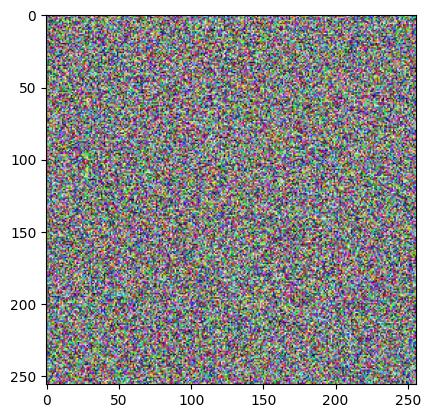

In [55]:
img = plt.imshow(random_image)

In [56]:
img_tensor = random_image.type(torch.float).permute(2, 0, 1)
img_tensor.size()

torch.Size([3, 256, 256])

In [57]:
embedding = embedder(img_tensor)
print(embedding.size())

torch.Size([768, 16, 16])


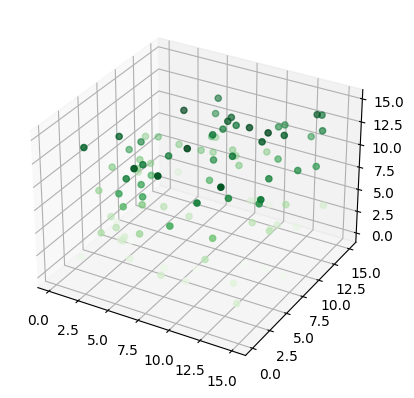

In [64]:
ax = plt.axes(projection='3d')
zdata = 15*(np.random.random(100))
xdata = 15*(np.random.random(100))
ydata = 15*(np.random.random(100))
ax.scatter3D(xdata, ydata, zdata, c = zdata, cmap='Greens')